In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)= f_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:

train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_images=train_images/255.0
test_images=test_images/255.0


In [7]:
class_names=['t','trou','pull','dress','coat','sandal','shirt','sneak','bag','ankle_boot']

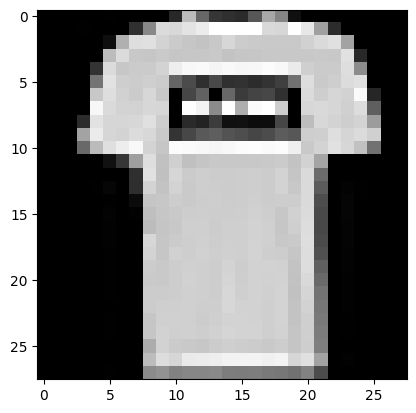

In [8]:
plt.figure()
plt.imshow(train_images[1], cmap='gray')
plt.show()

In [9]:
mod = tf.keras.models.Sequential()
mod.add(tf.keras.layers.Flatten(input_shape=(28,28)))
mod.add(tf.keras.layers.Dense(128, activation ='relu'))
mod.add(tf.keras.layers.Dense(10, activation='softmax'))



In [10]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    mod.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
    mod.fit(train_images,train_labels,epochs=3)
    valLoss, valacc = mod.evaluate(test_images,test_labels)
    print("accuracy",valacc)
    mod.save('fcc model')

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5042 - accuracy: 0.8238
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8650
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.3550 - accuracy: 0.8690
accuracy 0.8690000176429749
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fcc model\assets
18.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
if tf.test.gpu_device_name():
      print(f'Default GPU Device:{tf.test.gpu_device_name()}')  
else:
      print("Please check your installation")

def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img


Default GPU Device:/device:GPU:0


In [12]:

#from tensorflow.keras.utils import load_img
#from tensorflow.keras.utils import img_to_array
#from tensorflow.keras.models import load_model
img = load_image('sample_image.png')

#mod = load_model('fcc model')
result = mod.predict(img)
classx = np.argmax(result,axis=1)
classx = int(classx)
print(class_names[classx])
img = img.reshape(28,28)
plt.figure()
plt.imshow(img,cmap='gray')
plt.show()


NameError: name 'load_img' is not defined